# Exploring Traffic

AADT: Annual Average Daily Traffic

In [1]:
### Import Libraries

# File manipulation

import os # For working with Operating System
from sys import platform # Diagnose operating system

# Analysis

import numpy as np # For working with Arrays
import pandas as pd # Data Manipulation
import geopandas as gpd # Spatial Data Manipulation

# Visualization

from pprint import pprint # Pretty Printing
import seaborn as sns
import matplotlib.pyplot as plt # Basic Plotting
import contextily # Base Map Visualization

import warnings
warnings.filterwarnings('ignore') # Ignores some warnings

In [2]:
### Definitions

cwd = os.getcwd() # Current Working Directory

# Forward or back slashs for filepaths? <- Not sure here. Only know Windows & Linux

if platform == "linux" or platform == "linux2":
    slash = '/'
elif platform == 'win32':
    slash = '\\'
    
    
def basic_stats(array):
    '''This function will print basic stats about an array'''
    
    print('Mean: ', array.mean())
    print('Median: ', array.median())
    print('Std. Devation: ', array.std())
    
    f, ax = plt.subplots(1,1, figsize = (6, 4))
    array.hist(bins = 20, ax = ax)
    plt.show()

In [3]:
# Load data

cwd = os.getcwd()

mpls_aadt_path = cwd + slash + 'CleaningData' + slash + 'Traffic' + slash + 'mpls_aadtWGS84.geojson'

traffic = gpd.read_file(mpls_aadt_path)

aadt = traffic[['SEQUENCE_N', 'ROUTE_LABE', 'CURRENT_VO', 'geometry']] # Focus

5800.0
Mean:  10364.33216168717
Median:  5800.0
Std. Devation:  19031.60415699182


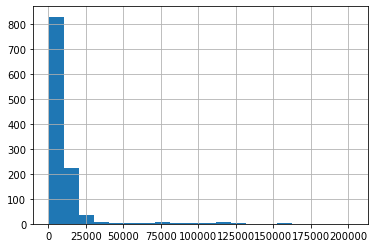

Mean:  3.7306558474116702
Median:  3.7634279935629373
Std. Devation:  0.4817539687555457


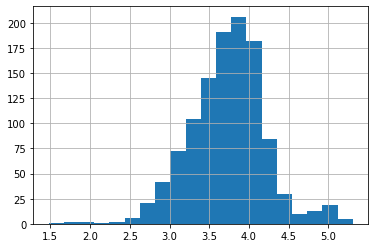

In [4]:
# Explore distribution

volume = aadt['CURRENT_VO']

print(volume.median()) # 5800 Vehicles/day is the median of the data...

basic_stats(volume) # Looks very heavily tailed, skewed right

# Let's explore log

log_vol = np.log10(volume)
      
basic_stats(log_vol) # That's better!

In [5]:
# 5000 vehicles will be a cutoff?

std = log_vol.std()
mean = log_vol.mean()

cutoffs = [10**(mean-std), 10**(mean), 10**(mean+std)]

print(cutoffs)

[1773.7886786717595, 5378.434046382046, 16308.34221635856]


In [6]:
# Let's use

# Let's do 
# 1773 - low
# 5378 - mid-low
# 16308 - mid
# 100000 - High
# Above - Very High! <- Could potentiall use another break here